In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy.linalg as sp

In [2]:
nikkei = pd.read_csv("Nikkei-2010-2012.csv",index_col="Ticker")

In [3]:
def Part_one():
    returns_df = pd.DataFrame()
    sin_ultimo = nikkei.columns[:-1]
    sin_primero = nikkei.columns[1:]
    tupla = zip(sin_ultimo,sin_primero)
    for F0, F1 in tupla:
        Fecha_inicio = str(F0) 
        Fecha_Final = str(F1)
        Pt = np.array(nikkei[F0])
        Pt_1 = np.array(nikkei[F1])
        returns_df["{} a {}".format(Fecha_inicio,Fecha_Final)] = (Pt_1 - Pt)/ Pt
    returns_df.set_index(nikkei.index, inplace=True)    
    return returns_df


R_vals = Part_one()
PCM = R_vals.T.corr()

C:\Users\DKmat\AppData\Local\Temp/ipykernel_14620/3588060676.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df["{} a {}".format(Fecha_inicio,Fecha_Final)] = (Pt_1 - Pt)/ Pt


In [4]:
def Division_of_Epochs(epochs, Data_Frame):
    # Returns arrays of the columns of the specified Data Frame 
    # with a length equal to epochs 
    columns = np.array(Data_Frame.columns)
    division = np.arange(len(columns), step=epochs)[1:]
    cols = np.array_split(columns,division)
    return cols

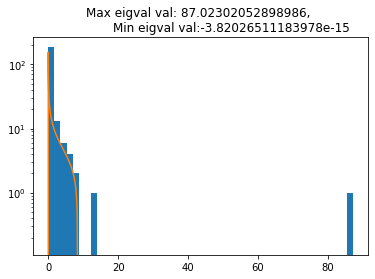

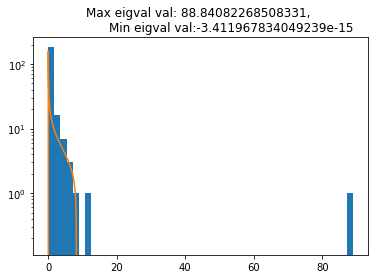

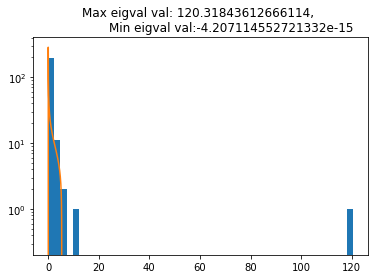

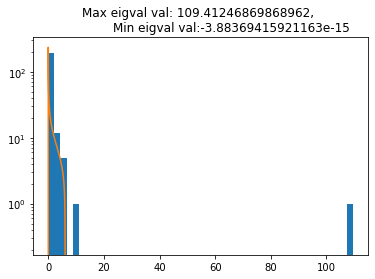

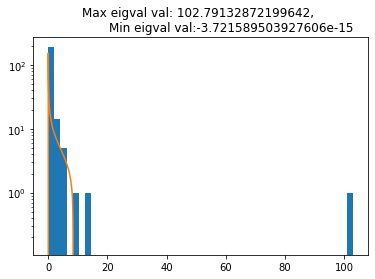

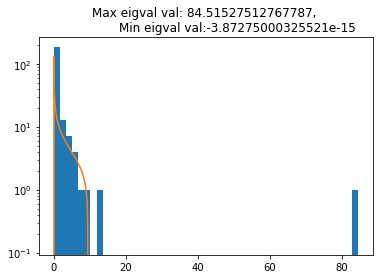

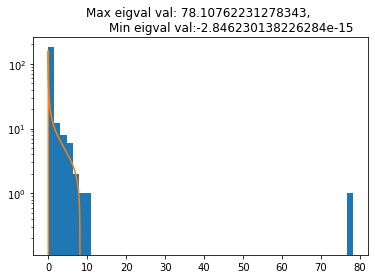

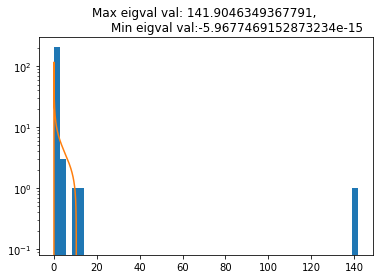

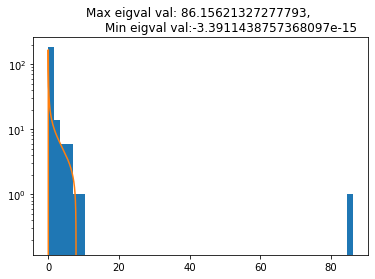

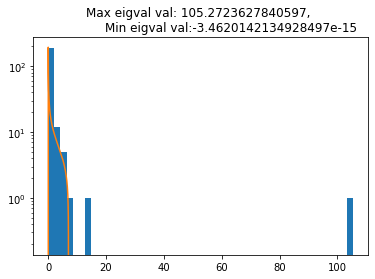

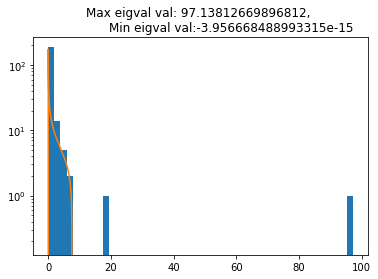

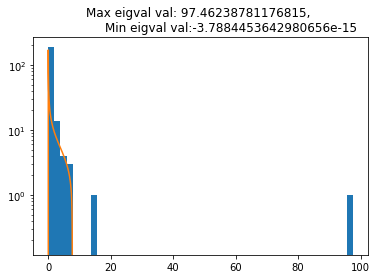

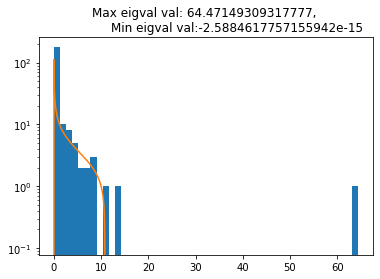

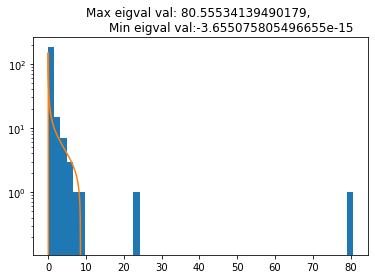

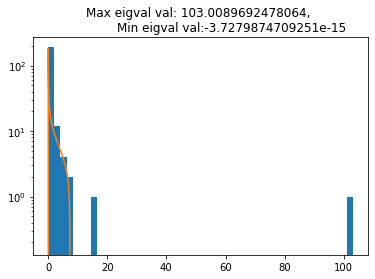

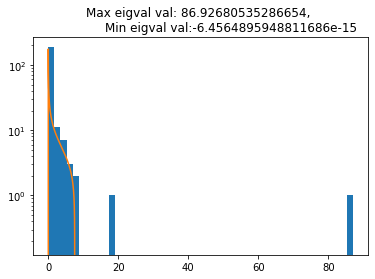

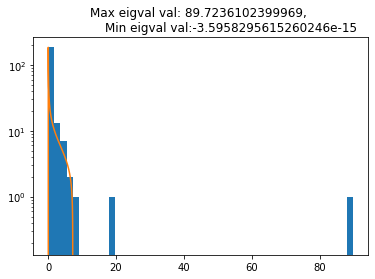

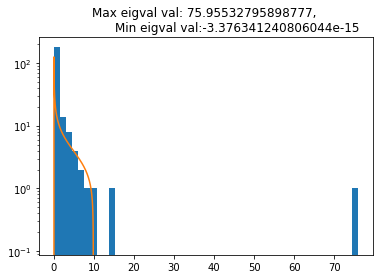

In [6]:
def MPDist(l, L, c):
    k = 2/( (l + L)/(1-c) - 2 )
    X = np.linspace(l, L, 1000)
    Y = []
    for x in X:
        Y.append((100*k/(2*pi*(1 - c)*x)) * sqrt((L - x) * (x - l))) #The 100 is for log scale
    return X, Y

def Wishart(Data_Frame):
    cols=Division_of_Epochs(40, Data_Frame) #18 epochs (19th dropped)
    # We drop the last epoch
    for columns in cols[:-1]:
        Epoch_corr = Data_Frame[columns].T.corr()
        
        # Get the eigenvalues
        Eigvals = np.linalg.eigvals(Epoch_corr).real
        
        # Normalize the eigenvalues
        E_mean = np.mean(Eigvals) # Mean
        E_std = np.std(Eigvals) # Std Dev
        Norm_Eigvals= (Eigvals-E_mean)/E_std
        
        # Plot the histogram
        plt.figure()
        ax = plt.gca()
        ax.set_yscale('log')
        plt.title("""Max eigval val: {}, 
                Min eigval val:{}""".format(max(Eigvals),min(Eigvals)))
        plt.hist(Eigvals,bins=50) #bins=np.linspace(min(Eigvals),2)
        plt.plot(MPDist(min(Eigvals), min([max([i for i in Eigvals if i <= 20]),np.sort(Eigvals)[-3]]), 0.1)[0], MPDist(min(Eigvals), min([max([i for i in Eigvals if i <= 20]),np.sort(Eigvals)[-3]]), 0.1)[1])
        plt.show()

Wishart(R_vals)

As we can see, some epochs have multiple outlier groups which also makes difficult identifying which is the proper distribution but in general it matches pretty accurately with Maschur Paschenko.